# Maternal Health Risk Data Prediction

### Importing Libraries

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

In [56]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Maternal Health Risk Data Set.csv')
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
df.mean()

Age             29.871795
SystolicBP     113.198225
DiastolicBP     76.460552
BS               8.725986
BodyTemp        98.665089
HeartRate       74.301775
dtype: float64

In [8]:
df.skew()

Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             1.868203
BodyTemp       1.750988
HeartRate     -1.043525
dtype: float64

In [9]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [10]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [11]:
df.shape

(1014, 7)

### Exploratory Data Analysis

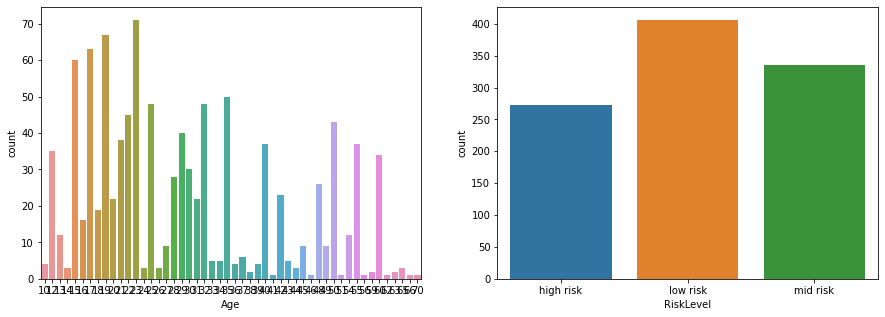

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data = df, x ='Age', ax=ax[0])
sns.countplot(data = df, x ='RiskLevel', ax=ax[1])

plt.show()

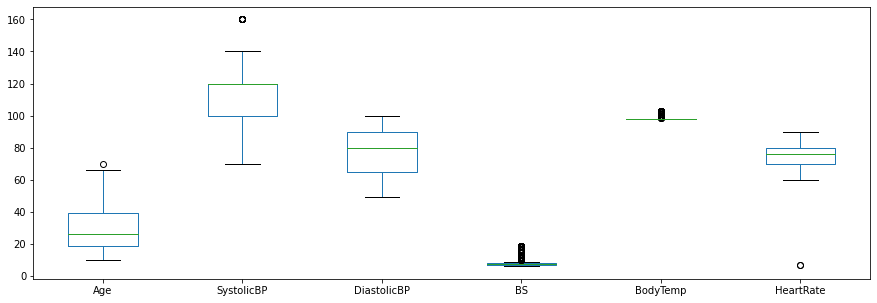

In [14]:
df.boxplot(figsize=(15,5))
plt.grid(False)
plt.show()

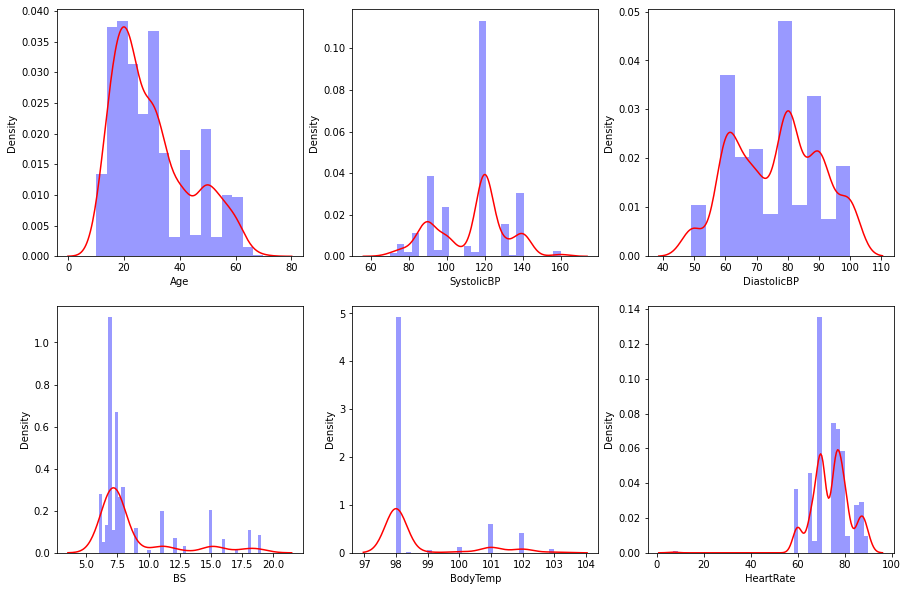

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.distplot(df['Age'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['SystolicBP'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['DiastolicBP'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['BS'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['BodyTemp'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['HeartRate'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})


plt.show()

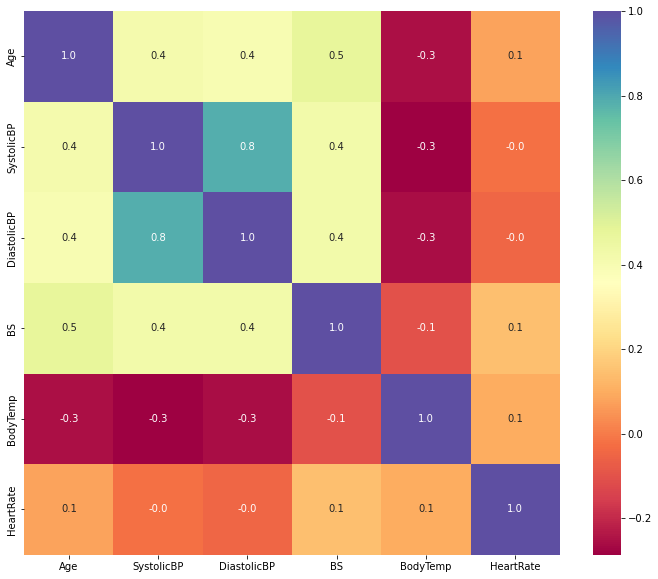

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'Spectral')
plt.show()

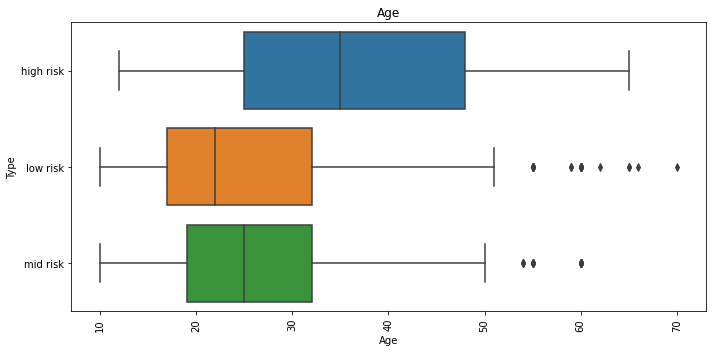

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Age', y='RiskLevel')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Type')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()     

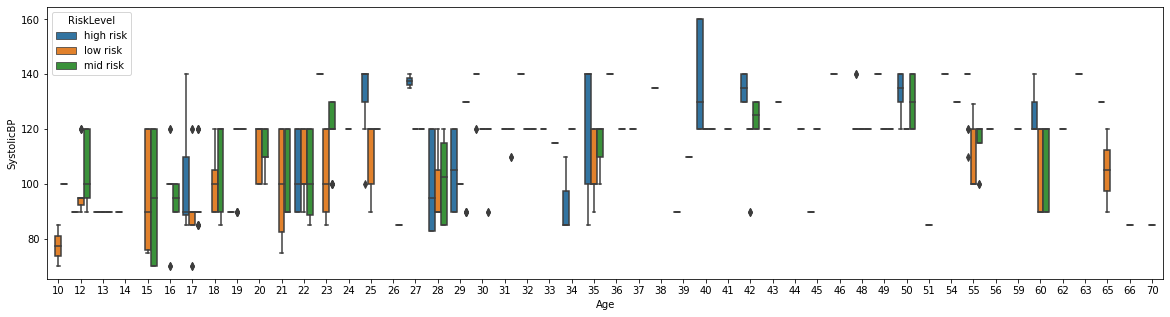

In [22]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='Age', y='SystolicBP', hue='RiskLevel')
plt.show()

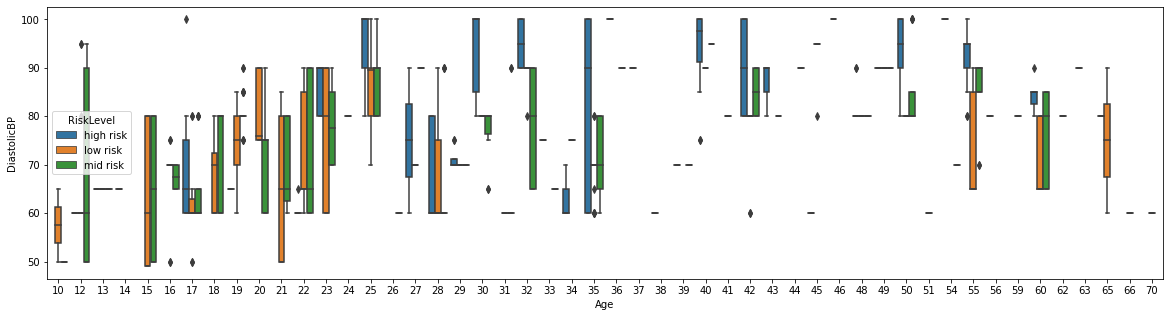

In [23]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='Age', y='DiastolicBP', hue='RiskLevel')
plt.show()

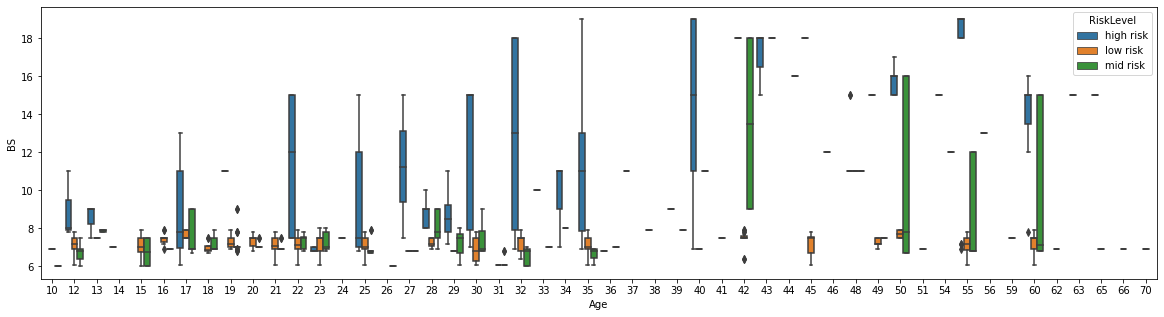

In [27]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='Age', y='BS', hue='RiskLevel')
plt.show()

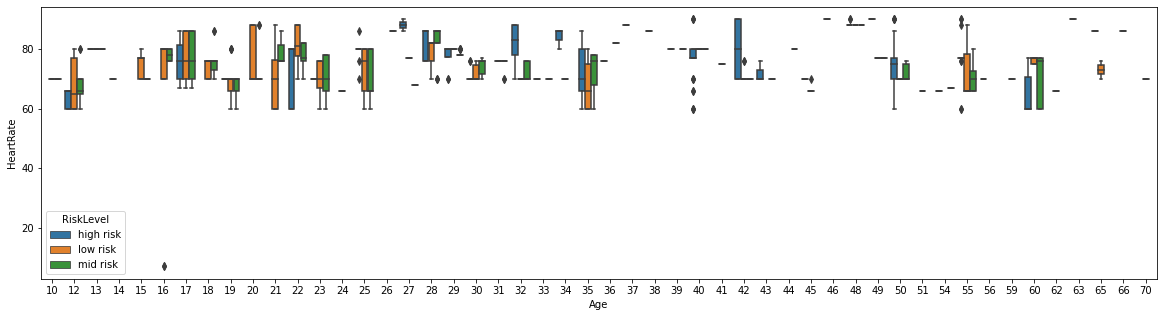

In [28]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='Age', y='HeartRate', hue='RiskLevel')
plt.show()

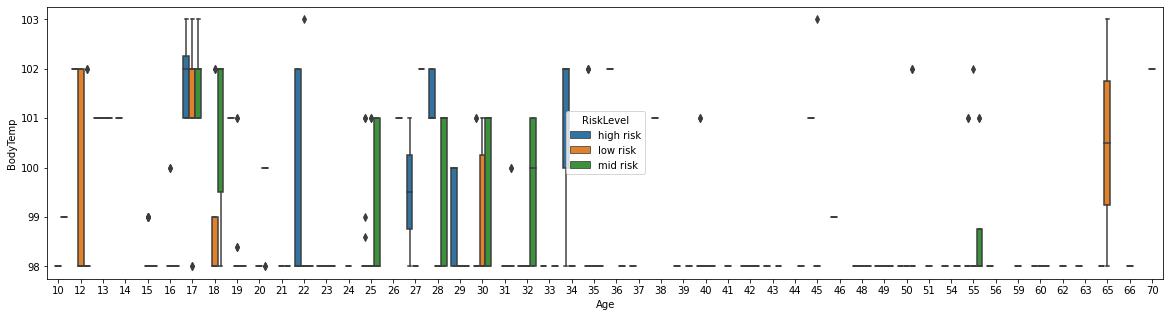

In [29]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='Age', y='BodyTemp', hue='RiskLevel')
plt.show()

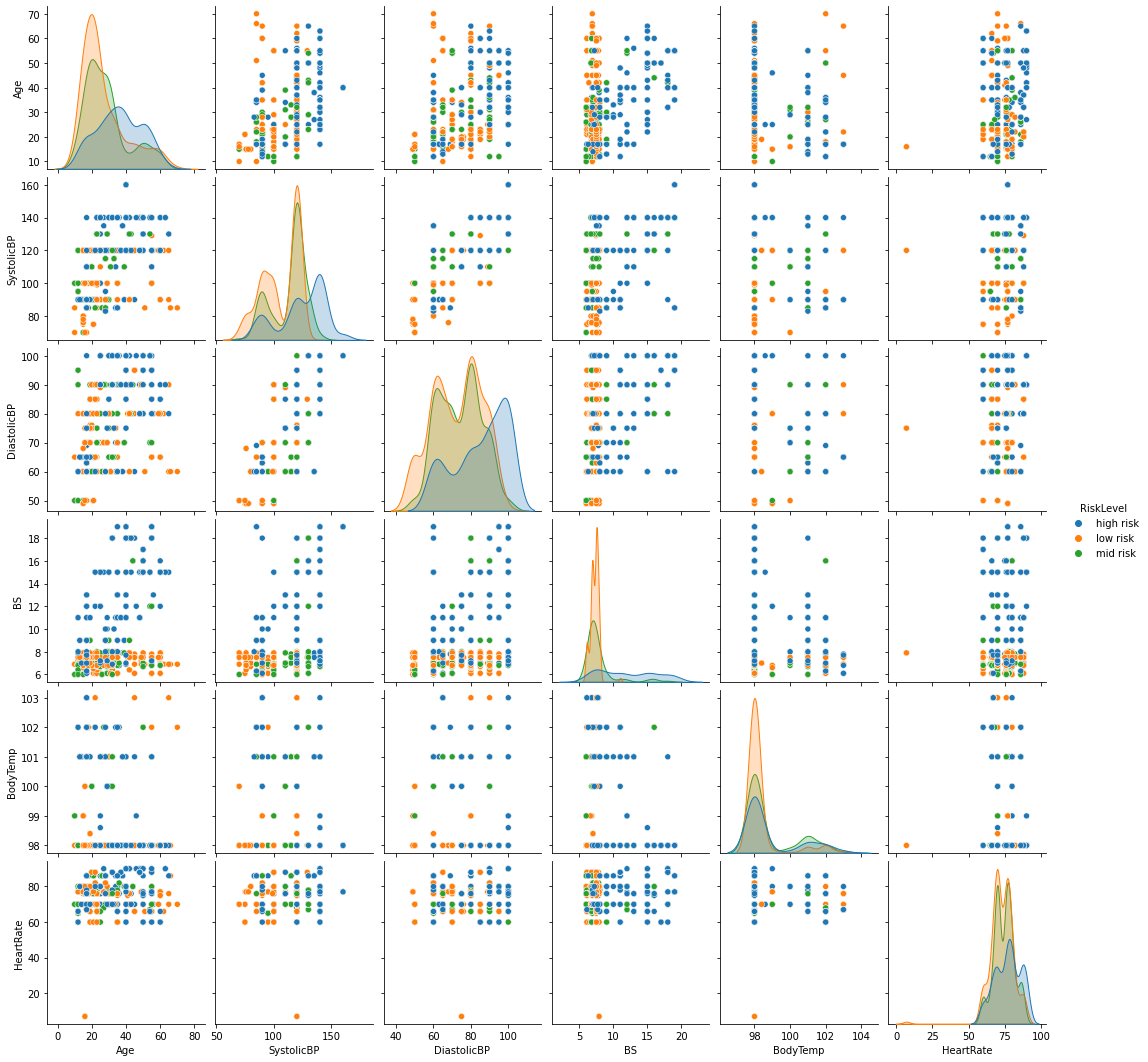

In [57]:
sns.pairplot(df, hue ='RiskLevel')
plt.show()

### Encoder

In [37]:
lb = LabelEncoder()
df['RiskLevel'] = lb.fit_transform(df['RiskLevel'])
df.head(1)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0


### Modeling and Evaluation

In [39]:
X_M = df.drop('RiskLevel', axis = 1)
Y_M = df['RiskLevel']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M) 

### Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

### Logistic Regression

In [41]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72        76
           1       0.60      0.92      0.72       117
           2       0.64      0.27      0.38       112

    accuracy                           0.63       305
   macro avg       0.65      0.64      0.61       305
weighted avg       0.64      0.63      0.60       305

accuracy:  0.6327868852459017
mean_absolute_error:  0.46557377049180326
mean_squared_error:  0.6622950819672131


### Random Forest Classifier

In [42]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        76
           1       0.83      0.75      0.79       117
           2       0.75      0.78      0.76       112

    accuracy                           0.80       305
   macro avg       0.80      0.81      0.81       305
weighted avg       0.80      0.80      0.80       305

accuracy:  0.8
mean_absolute_error:  0.2459016393442623
mean_squared_error:  0.3377049180327869


### Decision Tree 

In [43]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        76
           1       0.84      0.75      0.79       117
           2       0.74      0.78      0.76       112

    accuracy                           0.80       305
   macro avg       0.81      0.81      0.81       305
weighted avg       0.80      0.80      0.80       305

accuracy:  0.8
mean_absolute_error:  0.24918032786885247
mean_squared_error:  0.3475409836065574


### SVC

In [52]:
model_SVC = SVC(kernel = 'rbf' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        76
           1       0.63      0.90      0.74       117
           2       0.74      0.36      0.48       112

    accuracy                           0.70       305
   macro avg       0.72      0.71      0.69       305
weighted avg       0.71      0.70      0.67       305

accuracy:  0.6950819672131148
mean_absolute_error:  0.3704918032786885
mean_squared_error:  0.5016393442622951


### KNeighborsClassifier

In [45]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.79        76
           1       0.62      0.78      0.69       117
           2       0.60      0.42      0.49       112

    accuracy                           0.66       305
   macro avg       0.67      0.67      0.66       305
weighted avg       0.65      0.66      0.64       305

accuracy:  0.6557377049180327
mean_absolute_error:  0.419672131147541
mean_squared_error:  0.5704918032786885


1    117
2    112
0     76
Name: RiskLevel, dtype: int64


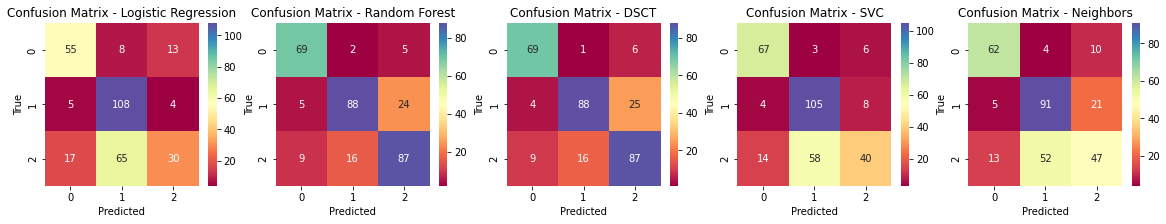

In [53]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

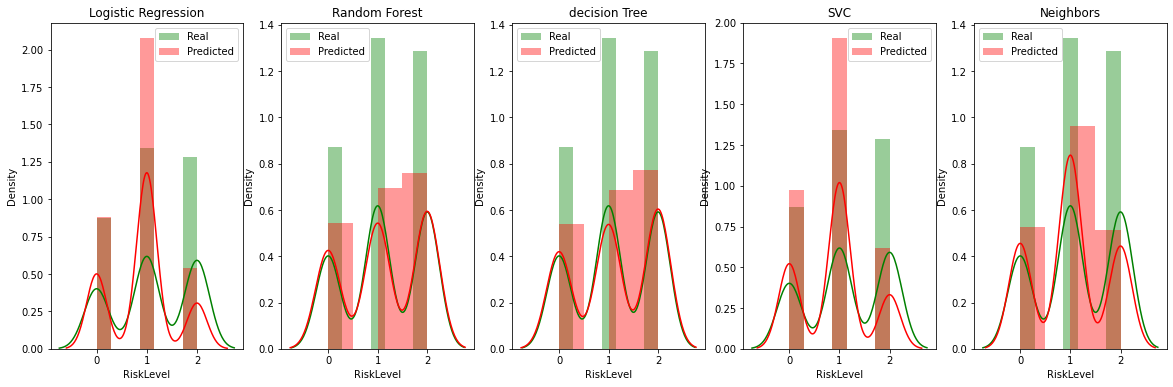

In [55]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()